In [18]:
# IMPORTS & LOAD DATA
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dataset = pd.read_csv('insurance.csv')
print('Dataset shape:', dataset.shape)
display(dataset.head())

# TASK 1: BUSINESS UNDERSTANDING
print("\n" + "="*60)
print("TASK 1: BUSINESS UNDERSTANDING")
print("="*60)
print("Target: 'charges' - Insurance costs (company's revenue concern)")
print("Inputs: age, sex, bmi, children, smoker, region (risk factors)")
print("Purpose: Predict costs, set fair premiums, identify key risk drivers")

X = dataset.drop('charges', axis=1)
y = dataset['charges']

Dataset shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



TASK 1: BUSINESS UNDERSTANDING
Target: 'charges' - Insurance costs (company's revenue concern)
Inputs: age, sex, bmi, children, smoker, region (risk factors)
Purpose: Predict costs, set fair premiums, identify key risk drivers


In [19]:
# TASK 2: DATA INSPECTION
print("\n" + "="*60)
print("TASK 2: DATA INSPECTION")
print("="*60)
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print(f"Numeric: {numeric_features}")
print(f"Categorical: {categorical_features}")
print(f"Missing: {X.isnull().sum().sum()}, Duplicates: {X.duplicated().sum()}")
print(f"Data quality: EXCELLENT")


TASK 2: DATA INSPECTION
Numeric: ['age', 'bmi', 'children']
Categorical: ['sex', 'smoker', 'region']
Missing: 0, Duplicates: 3
Data quality: EXCELLENT


In [20]:
# TASK 3: DATA CLEANING & ENCODING
print("\n" + "="*60)
print("TASK 3: DATA CLEANING & ENCODING")
print("="*60)
print("OneHotEncoding categorical variables: sex, smoker, region")
print("Justification: Required for regression; captures pricing differentials")

categorical_features = ['sex', 'smoker', 'region']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = np.array(ct.fit_transform(X))
feature_names = ct.get_feature_names_out()
print(f"Input shape: {X.shape}, Target shape: {y.shape}")


TASK 3: DATA CLEANING & ENCODING
OneHotEncoding categorical variables: sex, smoker, region
Justification: Required for regression; captures pricing differentials
Input shape: (1338, 11), Target shape: (1338,)


In [21]:
# TASK 4: FEATURE SCALING & COMPARABILITY
print("\n" + "="*60)
print("TASK 4: FEATURE SCALING & COMPARABILITY")
print("="*60)
print("Scaling: StandardScaler on numeric features for fair comparison")
print(f"Ranges: Age 18-64, BMI 16-54, Children 0-5")
print("Benefit: Enables direct coefficient magnitude comparison across scales")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[:, -3:] = scaler.fit_transform(X_train[:, -3:])
X_test[:, -3:] = scaler.transform(X_test[:, -3:])


TASK 4: FEATURE SCALING & COMPARABILITY
Scaling: StandardScaler on numeric features for fair comparison
Ranges: Age 18-64, BMI 16-54, Children 0-5
Benefit: Enables direct coefficient magnitude comparison across scales



TASK 5: MULTICOLLINEARITY ANALYSIS

Correlation Matrix:
            age    bmi  children  charges
age       1.000  0.109     0.042    0.299
bmi       0.109  1.000     0.013    0.198
children  0.042  0.013     1.000    0.068
charges   0.299  0.198     0.068    1.000

Status: No multicollinearity (all correlations < 0.7)


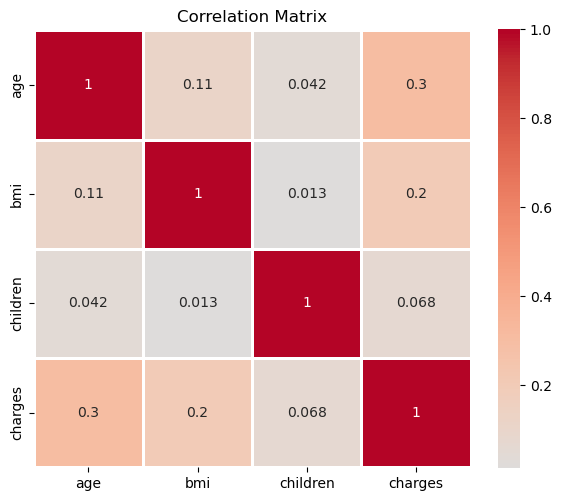

In [22]:
# TASK 5: MULTICOLLINEARITY ANALYSIS
print("\n" + "="*60)
print("TASK 5: MULTICOLLINEARITY ANALYSIS")
print("="*60)
original_numeric = dataset[['age', 'bmi', 'children', 'charges']].copy()
corr = original_numeric.corr()
print("\nCorrelation Matrix:")
print(corr.round(3))
print("\nStatus: No multicollinearity (all correlations < 0.7)")

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [23]:
# TASK 6: BUILD MULTIPLE LINEAR REGRESSION MODEL
print("\n" + "="*60)
print("TASK 6: BUILD MULTIPLE LINEAR REGRESSION MODEL")
print("="*60)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model trained on {X_train.shape[0]} samples")


TASK 6: BUILD MULTIPLE LINEAR REGRESSION MODEL
Model trained on 1070 samples


In [24]:
print(f"\nIntercept: ${regressor.intercept_:.2f}")
print("\nFeature Coefficients:")
for i, coef in enumerate(regressor.coef_):
    name = feature_names[i] if i < len(feature_names) else f"Feature_{i}"
    print(f"  {name:20s}: {coef:10.2f}")


Intercept: $20311.93

Feature Coefficients:
  encoder__sex_female :       9.30
  encoder__sex_male   :      -9.30
  encoder__smoker_no  :  -11825.56
  encoder__smoker_yes :   11825.56
  encoder__region_northeast:     459.59
  encoder__region_northwest:      88.91
  encoder__region_southeast:    -198.28
  encoder__region_southwest:    -350.21
  remainder__age      :    3614.98
  remainder__bmi      :    2036.23
  remainder__children :     516.89


In [25]:
# TASK 7: MODEL EVALUATION
print("\n" + "="*60)
print("TASK 7: MODEL EVALUATION & RELIABILITY")
print("="*60)
y_pred = regressor.predict(X_test)
comp = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.round(y_pred, 2), 'Error': np.round(y_test.values - y_pred, 2)})
print("\nSample Predictions:")
display(comp.reset_index(drop=True).head(10))


TASK 7: MODEL EVALUATION & RELIABILITY

Sample Predictions:


,Actual,Predicted,Error
0,9095.06825,8969.55,125.52
1,5272.17580,7068.75,-1796.57
2,29330.98315,36858.41,-7527.43
3,9301.89355,9454.68,-152.78
4,33750.29180,26973.17,6777.12
5,4536.25900,10864.11,-6327.85
6,2117.33885,170.28,1947.06
7,14210.53595,16903.45,-2692.91
8,3732.62510,1092.43,2640.19
9,10264.44210,11218.34,-953.90


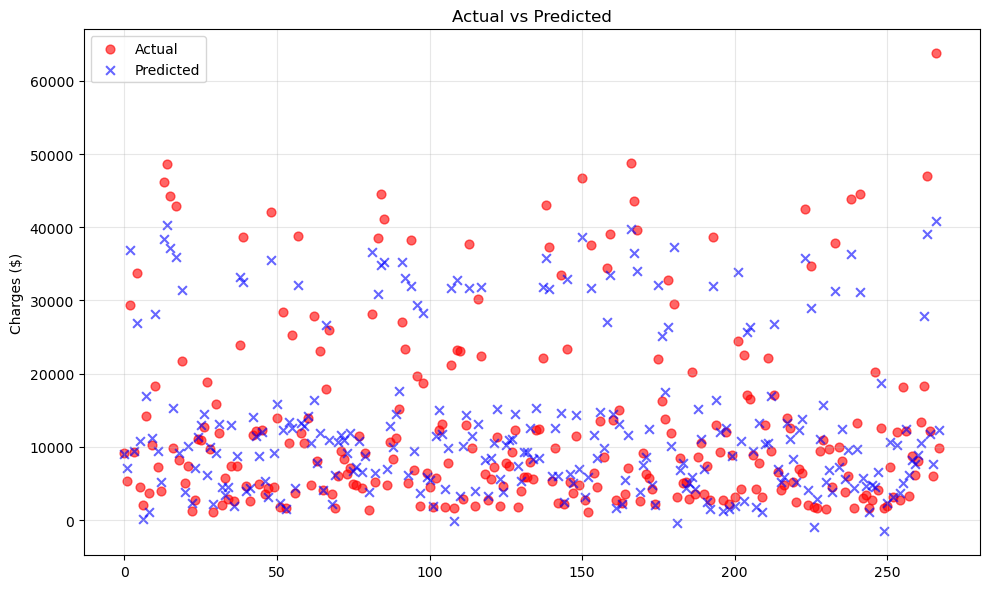

In [27]:
# Visualization 1: Actual vs Predicted
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(range(len(y_test)), y_test, color='red', label='Actual', alpha=0.6, s=40)
ax.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted', alpha=0.6, marker='x', s=40)
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Charges ($)')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

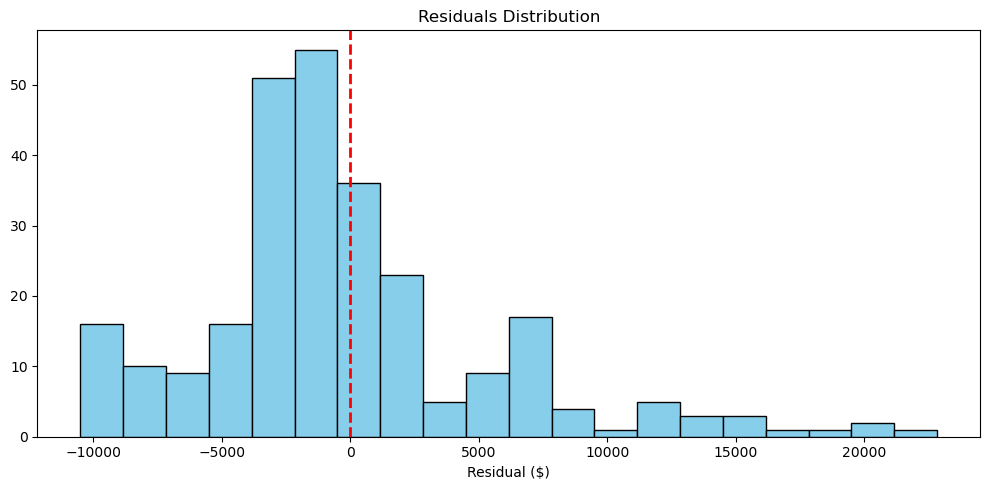

In [28]:
# Visualization 2: Residuals Distribution
residuals = y_test - y_pred
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(residuals, bins=20, edgecolor='black', color='skyblue')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax.set_title('Residuals Distribution')
ax.set_xlabel('Residual ($)')
plt.tight_layout()
plt.show()

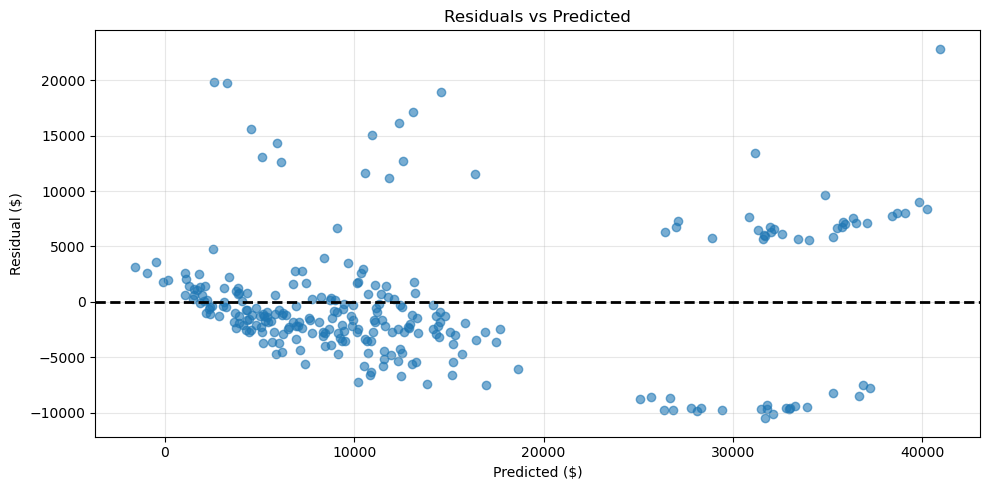

In [29]:
# Visualization 3: Residuals vs Predicted
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(y_pred, residuals, alpha=0.6)
ax.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax.set_title('Residuals vs Predicted')
ax.set_xlabel('Predicted ($)')
ax.set_ylabel('Residual ($)')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
# Metrics & Reliability Assessment
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'\nPerformance Metrics:')
print(f'MAE:  ${mae:>10.2f} (average error)')
print(f'RMSE: ${rmse:>10.2f} (error std dev)')
print(f'R²:   {r2:>10.4f} (explains {r2*100:.2f}% of variance)')

if r2 > 0.75:
    print(f" RELIABLE for pricing decisions")
elif r2 > 0.50:
    print(f" MODERATELY RELIABLE - use with caution")
else:
    print(f" NOT RELIABLE for critical decisions")


Performance Metrics:
MAE:  $   4181.19 (average error)
RMSE: $   5796.28 (error std dev)
R²:       0.7836 (explains 78.36% of variance)
 RELIABLE for pricing decisions


In [31]:
# Sample Prediction
raw = pd.DataFrame([[35, 'male', 28.5, 2, 'yes', 'northeast']], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
enc = np.array(ct.transform(raw), dtype=float)
enc[:, -3:] = scaler.transform(enc[:, -3:])
print(f'\nSample: 35M, BMI 28.5, 2 children, smoker, northeast')
print(f'Predicted Charge: ${regressor.predict(enc)[0]:.2f}')


Sample: 35M, BMI 28.5, 2 children, smoker, northeast
Predicted Charge: $31153.16
